In [35]:
import sys
sys.path.append("..")


import cv2
import numpy as np
from glob import glob
from models import Yolov4
# Define density thresholds
HIGH_DENSITY_THRESHOLD = 20
MEDIUM_DENSITY_THRESHOLD = 10



In [36]:

import matplotlib.pyplot as plt


nms iou: 0.413 score: 0.3
all weights read
load from ../yolov4.weights
img shape:  (3999, 2666, 3)
1/1 [==============================] - 2s 2s/step
# of bboxes: 22


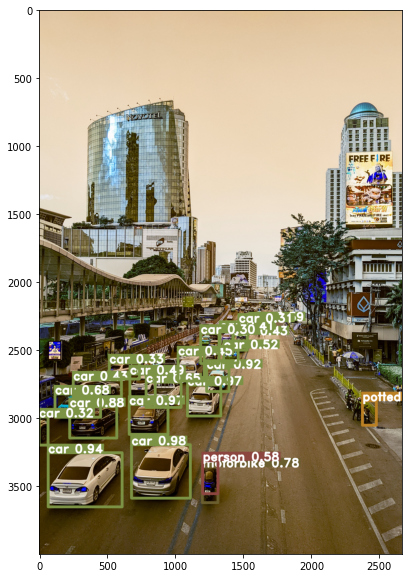

array([[[223, 195, 160],
        [224, 196, 161],
        [225, 197, 162],
        ...,
        [220, 191, 152],
        [217, 188, 149],
        [217, 188, 149]],

       [[223, 195, 160],
        [224, 196, 161],
        [225, 197, 162],
        ...,
        [220, 191, 152],
        [219, 190, 151],
        [219, 190, 151]],

       [[223, 195, 160],
        [224, 196, 161],
        [225, 197, 162],
        ...,
        [220, 191, 152],
        [221, 192, 153],
        [221, 192, 153]],

       ...,

       [[ 71,  53,  12],
        [ 71,  53,  12],
        [ 66,  48,   7],
        ...,
        [ 95,  73,  31],
        [ 95,  73,  31],
        [ 95,  73,  31]],

       [[ 79,  61,  20],
        [ 74,  56,  15],
        [ 66,  48,   7],
        ...,
        [ 97,  75,  33],
        [ 95,  73,  32],
        [ 95,  73,  32]],

       [[ 77,  59,  18],
        [ 68,  50,   9],
        [ 60,  43,   0],
        ...,
        [ 96,  74,  33],
        [ 97,  74,  36],
        [ 97,  74,  36]]

In [37]:

raw_img = cv2.imread('../img/traffic/mediumtraffic.jpg')

model = Yolov4(weight_path='../yolov4.weights',
               class_name_path='../class_names/coco_classes.txt')

output_img, detections = model.predict_img(raw_img, random_color=False, return_output=True)

output_img

In [38]:
print(detections[:5]) 

     x1    y1    x2    y2 class_name     score    w    h
0   679  3195  1111  3588        car  0.979665  432  393
1  1090  2756  1335  2984        car  0.972834  245  228
2   662  2899   947  3119        car  0.967421  285  220
3    67  3254   610  3652        car  0.943041  543  398
4  1231  2633  1395  2804        car  0.920095  164  171


In [39]:

num_vehicles = sum(detections['class_name'].isin(['car', 'truck']))
print("Total no. of cars and trucks:",num_vehicles)

Total no. of cars and trucks: 19


In [40]:


if num_vehicles >= HIGH_DENSITY_THRESHOLD:
    # color = (0, 0, 255)  
    label = 'High Density'
elif num_vehicles >= MEDIUM_DENSITY_THRESHOLD:
    # color = (0, 255, 255) 
    label = 'Medium Density'
else:
    # color = (0, 255, 0)  
    label = 'Low Density'


In [41]:

relevant_detections = detections[detections['class_name'].isin(['car', 'truck'])]

boxes = relevant_detections[['x1', 'y1', 'x2', 'y2']].values.tolist()


In [42]:

scale = 5
thickness = 10

(text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, scale, thickness)

text_x = (output_img.shape[1] - text_width) // 2
text_y = (output_img.shape[0] + text_height) // 2

cv2.rectangle(output_img, (text_x - 20, text_y + 20), (text_x + text_width + 20, text_y - text_height - 20), (0, 0, 0), -1)

cv2.putText(output_img, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, scale, (255, 255, 255), thickness)

output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)



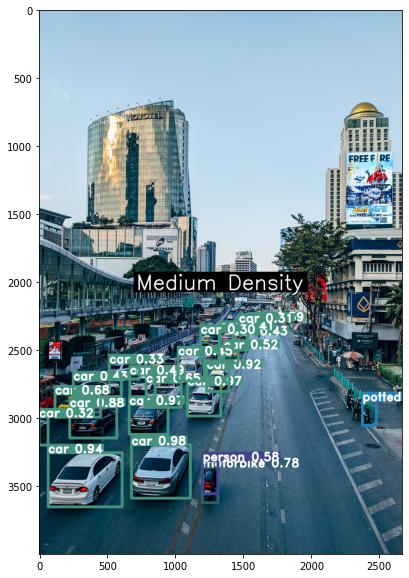

In [43]:

plt.figure(figsize=(10,10))
plt.imshow(output_img_rgb)
plt.show()